# Lab 7: Transformer

## Diego McHenry and Julia Gelfond

### March 25, 2024

Introduction: Transformers are essential for modern life. In this lab, we will build a transformer and explore the science and applications behind it.

Setup: The set up consists of various components. First, the oscilloscope recieves an input, in this lab we will give it two. It measures the potential difference versus time. We will produce sinusoidal waves and measure their time periods and potential amplitudes. The Function generator creates these oscilating potential differences and currents. We will set it to a constant 1.5kHz for the entirety of the lab. We directly apply the potential difference across the ends of the primary coil which is a solenoid; this is the first input to the oscilloscope. This generates a magnetic field which varies in direction and intensity due to the changing potential(and therefore current). This varying magnetic field can induce a current. We will make a transformer by taking a transformer core made of magnetically permiable materials and wrapping a wire around it. The wire will be wrapped a varying amound of times and thus be induced with varying potential strengths which will be measured; this is the second input. The oscilloscope is equiped with software which helps us collect data about the period and amplitude which will help us make more precise measurements.

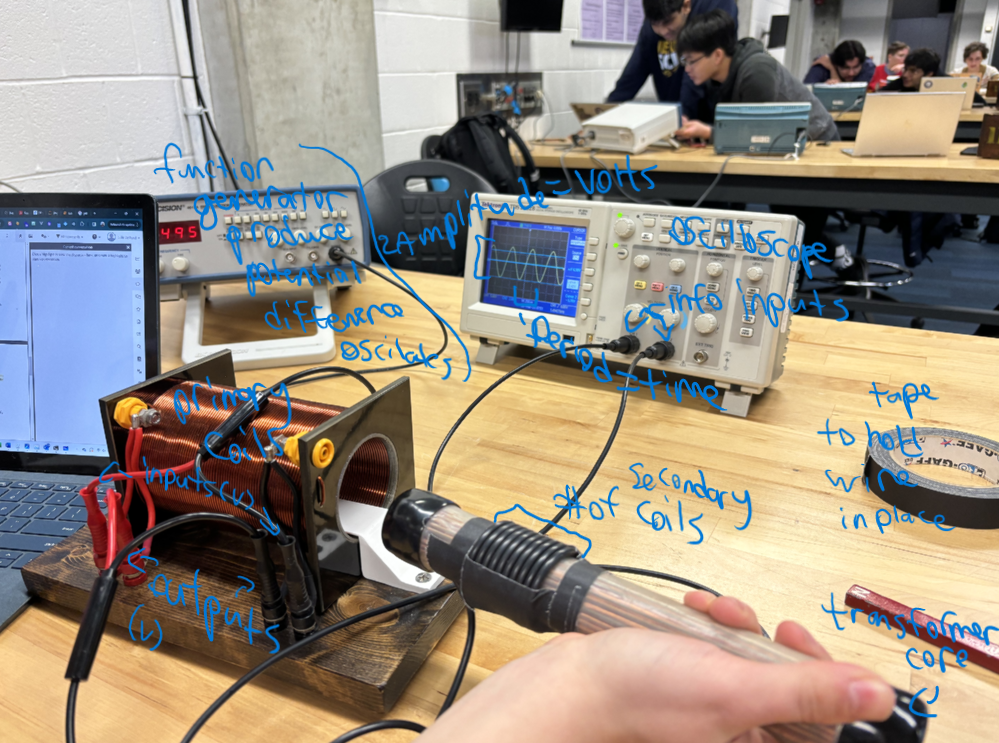

In [1]:
#potentially useful modules
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

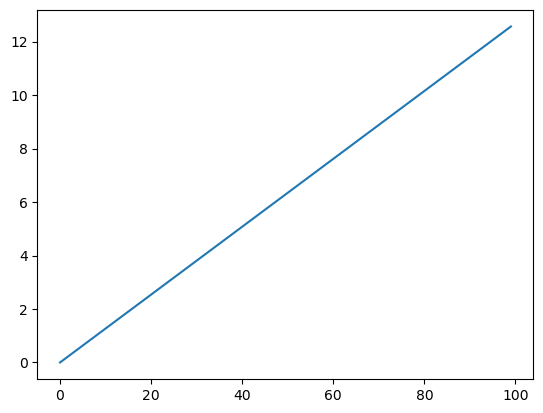

In [7]:
plt.figure()
x = np.linspace(0, 4*np.pi, 100)
plt.plot(x)

Data Collection: Data collection consists of wrapping the metal bar with the wire a varying number of times: we started at 10 and moved, one by one, down to 1. Each time we insert the bar into the solenoid we measure the voltage difference between the voltage peaks induced by the solenoid.

Analysis:

The measurements were in mV which should be converted to Volts and values which overlap were removed.

In [3]:
data = pd.read_excel("lab7data.xlsx")
#unit conversions
data['induced V (V)']=data['induced V (mV)']/1000
data['dinduced V (V)']=data['dinduced V (mV)']/1000
#remove bad data
data=data.drop(2)

Now that we have healthy and usable data, lets make a model. This will help us visually understand the numbers and make predictions. We will attempt to build a linear model because the data appears linear.

In [4]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data['coils'],
                            data['induced V (V)'],
                            sigma=data['dinduced V (V)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1]) 
print(f'{fitA:.3f} +- {fitdA:.3f} Volts/Coil')
print(f'{fitB:.3f} +- {fitdB:.3f} Volts')

0.039 +- 0.002 Volts/Coil
0.016 +- 0.009 Volts


Text(0.5, 1.0, 'Volts and Coils: A linear relationship!')

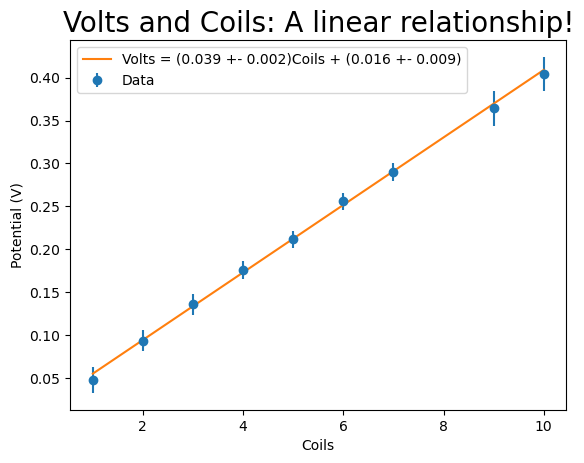

In [5]:
#there is no xerr to consider
(plt.errorbar(data['coils'], data['induced V (V)'], 
              yerr=data['dinduced V (V)'], fmt="o", label='Data'))

plt.plot(data['coils'], linmodel(data['coils'], fitA, fitB), label='Volts = (0.039 +- 0.002)Coils + (0.016 +- 0.009)')

plt.legend()
plt.xlabel('Coils')
plt.ylabel('Potential (V)')
plt.title(('Volts and Coils: A linear relationship!'), fontsize = 20)

The linear model seems to fit well. To put it to the test, we will calculate how many coils it would take to get a potential of 1 Volt and then apply the prediction to test its validity.

In [6]:
num = (1-fitB)/(fitA)
dnum = (num+fitdB)*(fitdA/fitA)
print(f'{num:.0f} +- {dnum:.0f} Coils to produce a peak to peak potential of 1 V')

25 +- 1 Coils to produce a peak to peak potential of 1 V


After calculating this prediction we made a transformer with 25 coils. Our voltage measurement was 1,000mV, or 1 V with some error. Our model, beautifully, predicted the outcome, effectively confirming the linear relationship between potential and number of coils under these conditions.

Results, error, and significance:

We determined that the induction on a secondary coil in a transformer varies linearly with the number of coils. In the transformer we created, each coil added .039 +- .002 Volts with an additional .016 +- .009 Volts for the intersection at coils = 0. By far the most significant source of error, and the only one we measured, was the error associated with the voltage readings. The lines were relatively large and fuzzy. The error appears reasonable in magnitude with the +-1 coil in the 25 coil prediction only being 4% the size of the prediction.

We tested these results by making a prediction which is well outside of our tested range. The prediction was 25 +- 1 coils would result in an amplitude of .5 Volts (1 volt peak to peak). This was remarkably accurate with the result being 1 Volt and an uncertainty in the order of about .03 Volts.

Significance: As mentioned, transformers have numerous applications. They provide a means to 'step down' the voltage applied to a device. The transformer we used does this by applying a voltage to allow current to flow through a solenoid, creating a magnetic field. 

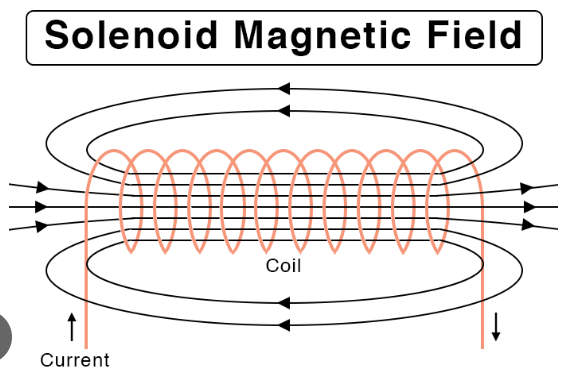

Varying the voltage varies the resulting magnetic field inside the solenoid. As shown by an equation:

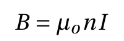

This changing field changes the induced emf:

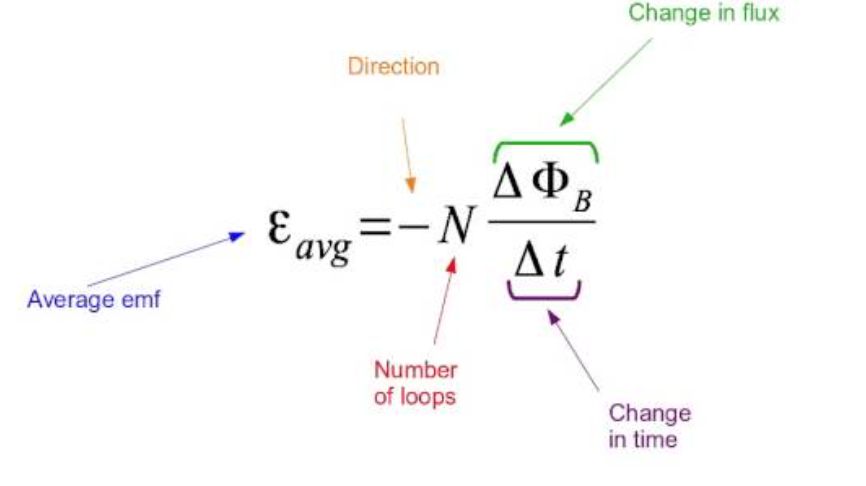

This equation shows that the emf is directly proportional to the change in flux and number of loops which is what we demonstrated in the lab.